# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     -- ---------------------------------- 41.0/675.6 kB 487.6 kB/s eta 0:00:02
     ----- ------------------------------ 102.4/675.6 kB 837.8 kB/s eta 0:00:01
     ---------- --------------------------- 184.3/675.6 kB 1.2 MB/s eta 0:00:01
     ------------- ------------------------ 245.8/675.6 kB 1.2 MB/s eta 0:00:01
     -------------- ----------------------- 266.2/675.6 kB 1.2 MB/s eta 0:00:01
     ---------------- --------------------- 297.0/675.6 kB 1.0 MB/s eta 0:00:01
     ----------------- ------------------ 327.7/675.6 kB 967.8 kB/s eta 0:00:01
     ------------------- ---------------- 368.6/675.6 kB 880.6 kB/s eta 0:00:01
     -------------------- --------------- 378.9/675.6 kB 873.6 kB/s eta 0:00:01
     --------------------- -------------- 409.6/675.6 kB 851.5 kB/s eta 0:00:01
     ------------------------ ----------- 450.6/675.6

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
weather_api_key = "11e7f4ca9ee272e343cfaabb7a799e5f"

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | miracema do tocantins
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
City not found. Skipping...
Processing Record 3 of Set 1 | inirida
City not found. Skipping...
Processing Record 4 of Set 1 | port saint john's
City not found. Skipping...
Processing Record 5 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 6 of Set 1 | whitehorse
City not found. Skipping...
Processing Record 7 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 8 of Set 1 | parabel'
City not found. Skipping...
Processing Record 9 of Set 1 | polyarnyy
City not found. Skipping...
Processing Record 10 of Set 1 | waitangi
City not found. Skipping...
Processing Record 11 of Set 1 | acapulco de juarez
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 13 of Set 1 | arroyito
City not found. Skipping

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-22.71,84,75,2.57,CA,1732978419
1,mhamid,29.8200,-5.7200,23.81,16,20,4.37,MA,1732978420
2,ilulissat,69.2167,-51.1000,-9.99,79,75,0.51,GL,1732978363
3,abepura,-2.6333,140.5833,25.45,94,20,0.51,ID,1732978422
4,puerto natales,-51.7236,-72.4875,14.25,44,75,11.83,CL,1732978423


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Challenge 6\python-api-challenge\Output_data\cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Challenge 6\python-api-challenge\Output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-22.71,84,75,2.57,CA,1732978419
1,mhamid,29.8200,-5.7200,23.81,16,20,4.37,MA,1732978420
2,ilulissat,69.2167,-51.1000,-9.99,79,75,0.51,GL,1732978363
3,abepura,-2.6333,140.5833,25.45,94,20,0.51,ID,1732978422
4,puerto natales,-51.7236,-72.4875,14.25,44,75,11.83,CL,1732978423


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

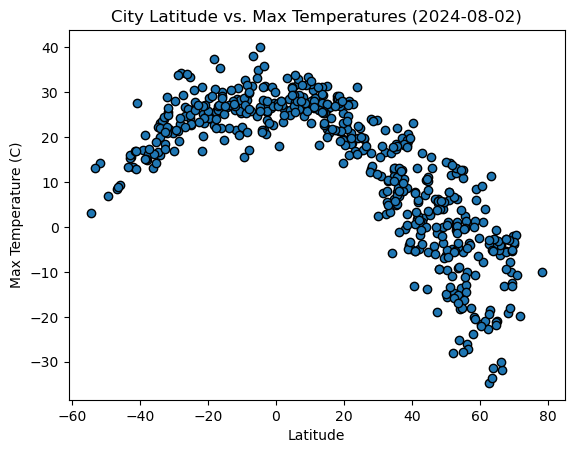

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperatures (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig(r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Challenge 6\python-api-challenge\Output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

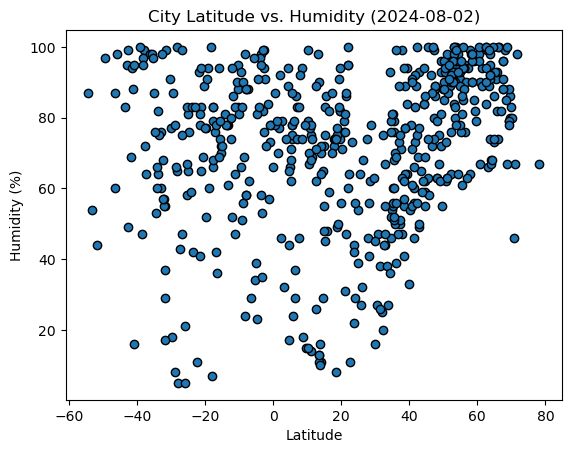

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Challenge 6\python-api-challenge\Output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

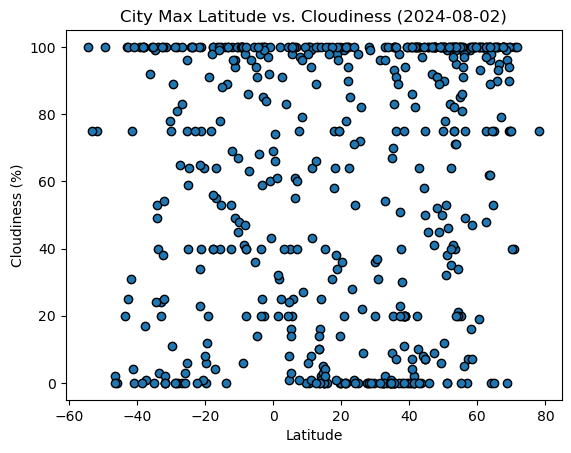

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Challenge 6\python-api-challenge\Output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

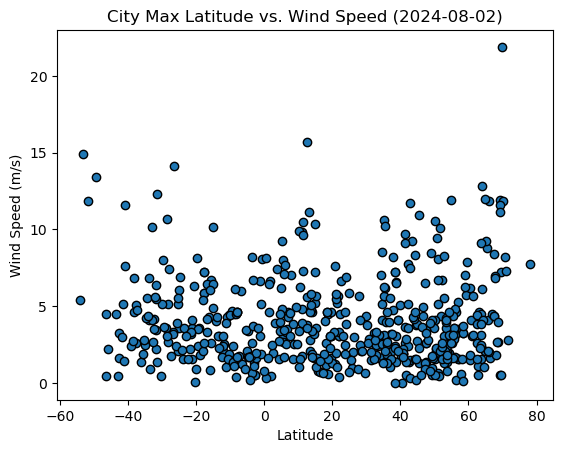

In [35]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors='black')


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig(r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Challenge 6\python-api-challenge\Output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, marker="o", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-22.71,84,75,2.57,CA,1732978419
1,mhamid,29.8200,-5.7200,23.81,16,20,4.37,MA,1732978420
2,ilulissat,69.2167,-51.1000,-9.99,79,75,0.51,GL,1732978363
6,vulcan,45.3833,23.2667,2.89,100,100,1.33,RO,1732978426
7,crane,31.3974,-102.3501,7.56,38,96,1.50,US,1732978427


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,abepura,-2.6333,140.5833,25.45,94,20,0.51,ID,1732978422
4,puerto natales,-51.7236,-72.4875,14.25,44,75,11.83,CL,1732978423
5,punta arenas,-53.1500,-70.9167,13.06,54,75,14.92,CL,1732978353
9,sao felix do xingu,-6.6447,-51.9950,37.99,29,96,1.23,BR,1732978429
10,chonchi,-42.6128,-73.8092,15.62,49,25,1.65,CL,1732978430


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8594818113108783


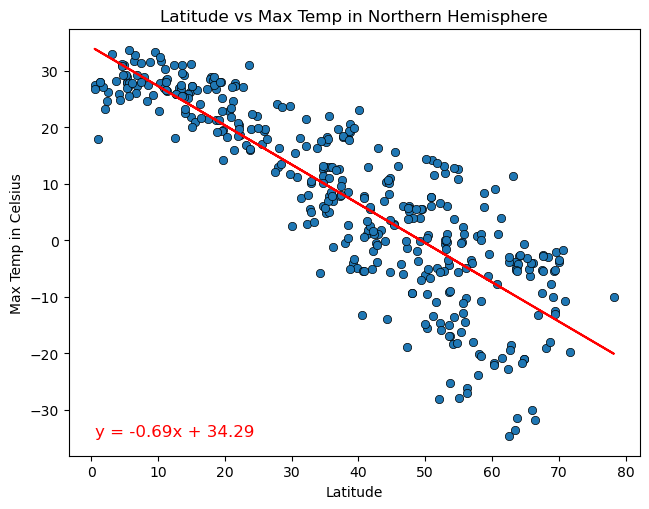

In [39]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp in Celsius")
plt.title("Latitude vs Max Temp in Northern Hemisphere")
plt.show()

The r-value is: 0.6484182474006005


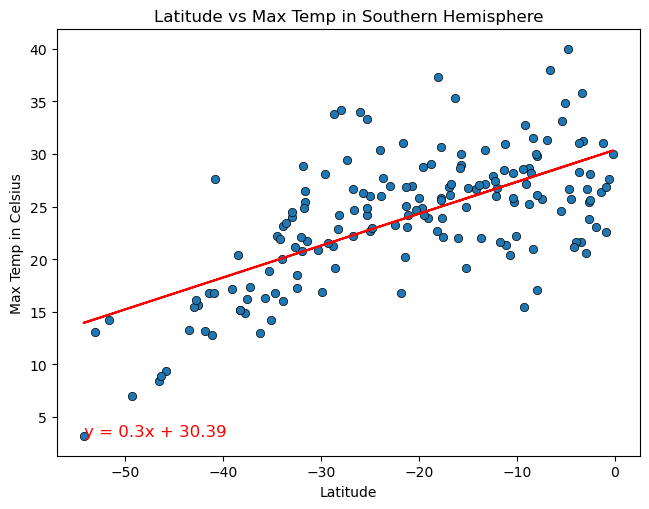

In [40]:

# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp in Celsius")
plt.title("Latitude vs Max Temp in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

With a'r-value' of -0.9, we have a strong negative correlation in the northern hemisphere and with a 'r-value' of 0.7, we have a strong positive correlation in the southern hemisphere between the distance from the equator and the Max Temperature.

This indicates that the closest we are to the equator, the higher are the max temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43287987270943556


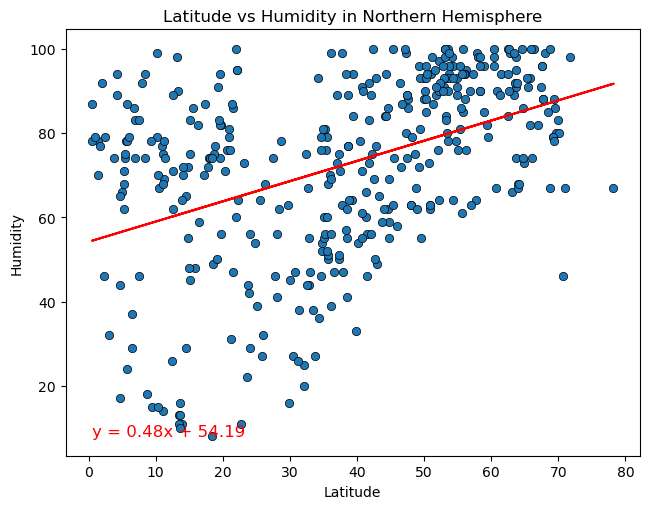

In [41]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Northern Hemisphere")
plt.show()

The r-value is: 0.024024699990569727


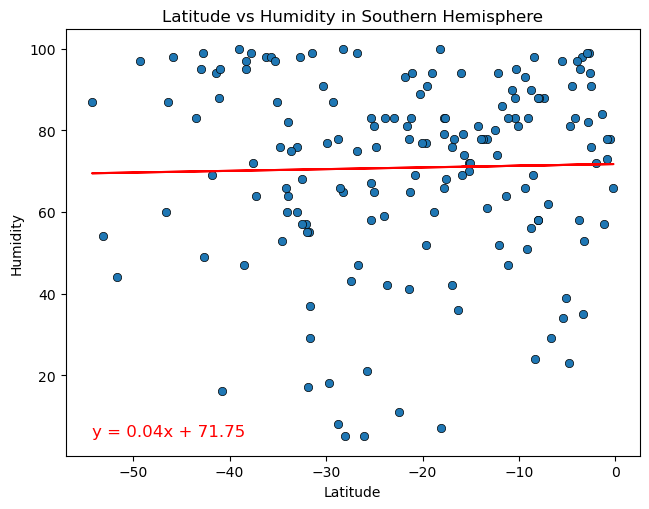

In [42]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on both "r-values" their is little correlation between the humidity and the lattitude.

When we look at the data, it seems that the cities far from the equator are more humid but it would be interesting to look at the data year over year.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29081115006955555


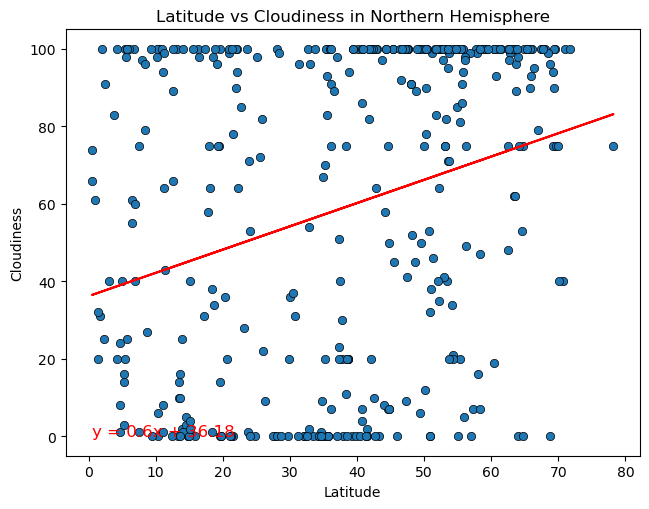

In [43]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: 0.21208439613778163


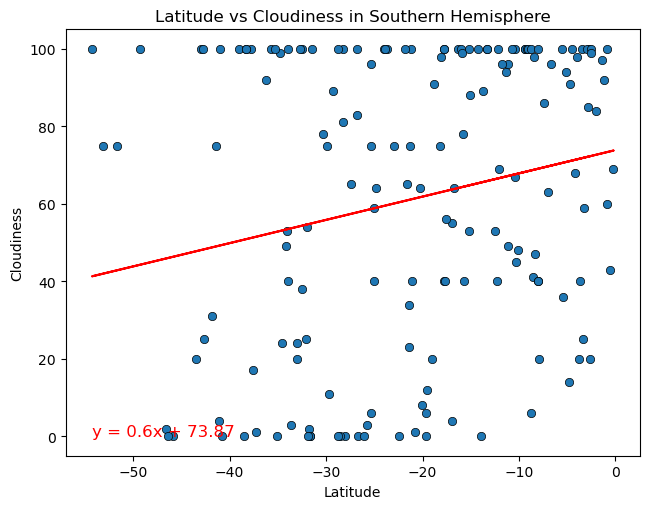

In [44]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on both "r-values" their is little correlation between the cloudiness and the lattitude.

When we look at the scatter plots, we can see that the cities in the northern hemisphere have more cloud coverage above 60% than the cities in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05104262237659143


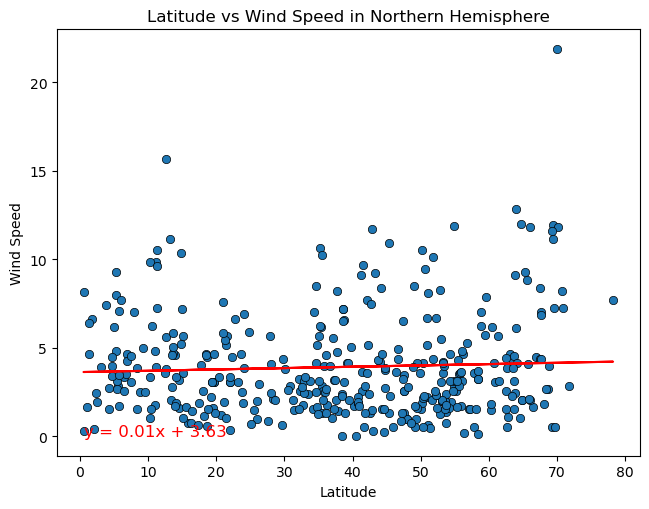

In [45]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Northern Hemisphere")
plt.show()

The r-value is: -0.29693916336515


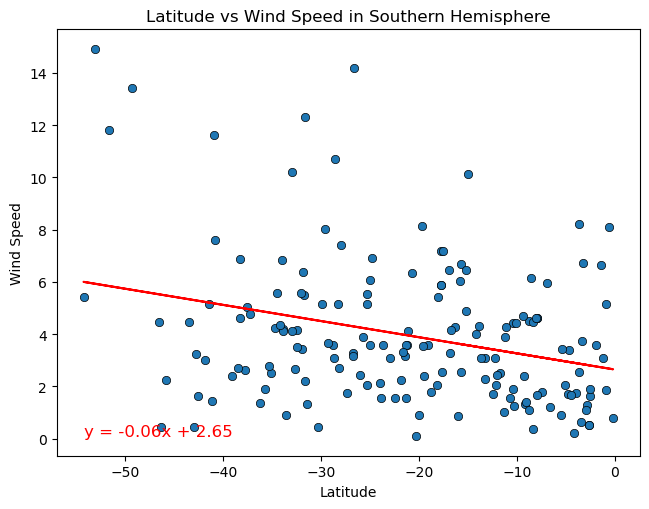

In [46]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Based on the "r-value" there is little correlation between Wind Speed and City Latitude for both hemispheres.